| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | 

**Authors:** Andrej Gajdoš, Martina Hančová, Jozef Hanč  <br> *[Faculty of Science](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN), P. J. Šafárik University in Košice, Slovakia* <br> emails: [andrej.gajdos@student.upjs.sk](mailto:andrej.gajdos@student.upjs.sk), [martina.hancova@upjs.sk](mailto:martina.hancova@upjs.sk)
***
**<font size=6 color=brown> FDSLRM applications - Insurance </font>**  

<font size=5> Insurance quotations expenditure </font> 

<a id=table_of_contents></a>
###  Table of Contents 
* [Data and model](#data_and_model) - data and model description, estimating parameters, software
* [Modeling](#modeling) - loading R functions and packages, data plot, periodogram
* [Residual diagnostics](#residual_diagnostics) - description of graphical tools, numerical tests
* [Fitting summary](#fitting_summary) - estimated model parameters, fit summary
* [Session info](#session_info) - list of applied R packages in computations
* [References](#references) - list of detailed references for data and applied methods

**To get back to the contents, use <font color=brown>the Home key</font>.**

***
<a id=data_and_model></a>
# <font color=brown>Data and model </font>


### Data description

In this FDSLRM application we model the time series data set, denoted as `insurance`, representing *insurance quotations expenditure*. The number of time series observations is $n=40$, the correspoding plot with more details is shown in the following section **_Modeling_**. The data was adapted from *Hyndman & Athanasopoulos, 2018*.


### Model description

The insurance advertising expenditure data can be succesfully fitted by the FDSLRM of the form:

$$ X(t)=\beta_1+\beta_2\sin\left(\tfrac{2\pi t}{40}\right)+\beta_3\sin\left(\tfrac{2\pi t\cdot 2}{40}\right)+\beta_4\cos\left(\tfrac{2\pi t\cdot 3}{40}\right)
+Y_1\cos\left(\tfrac{2\pi t\cdot 6}{40}\right)+Y_2\sin\left(\tfrac{2\pi t\cdot 6}{40}\right)
+w(t), \, t\in \mathbb{N}.$$ 

### Computational software
As for numerical calculations, we conducted our computations in _the R statistical computing language_ (https://www.r-project.org; _R Development Core Team, 2019_) and with R functions designed to work with FDSLRM programmed by authors of the Jupyter notebook included in _fdslrm_ (Gajdoš et. al., 2019) package. The complete list of used R libraries is included in **_Session info_**.

| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | 

***
<a id=modeling></a>
# <font color=brown>Modeling </font>

### Loading R functions and packages

In [1]:
# devtools::install_github("gajdosandrej/fdslrm")

In [1]:
library(fdslrm)
initialFDSLRM()

### Read data

In [2]:
# reading data from Hyndman's package fpp2
x <- ts(as.numeric(window(insurance)[,1]), start = c(2002,1), frequency = 12)
# times
t <- 1:length(x)

### Data plot

Monthly quotations expenditure for a US insurance company. January 2002 to April 2005. 

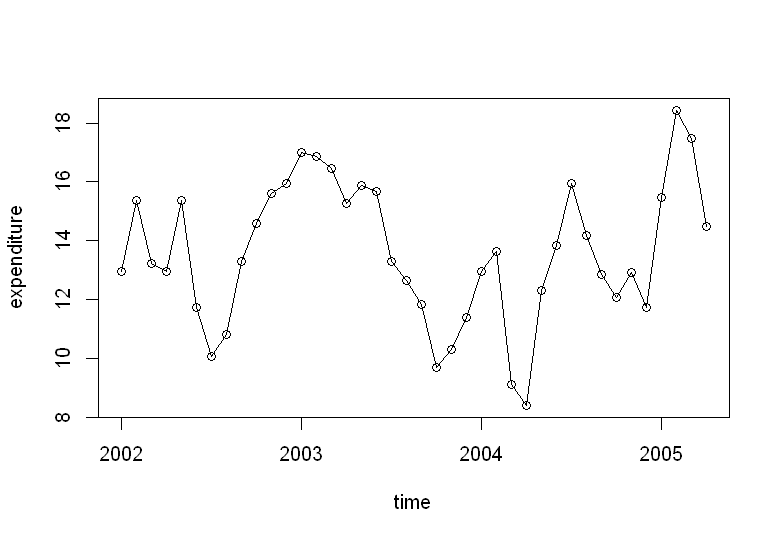

In [3]:
# IPython setting for output
options(repr.plot.res=120, repr.plot.height=4.5, repr.plot.width=6.5)

# plotting data from Hyndman's package fpp2
plot(x, type = "o", xlab = "time", ylab = "expenditure", xaxt = "n")
axis(1,at=2002:2005,labels=2002:2005)

### Spectral analysis - Periodogram 

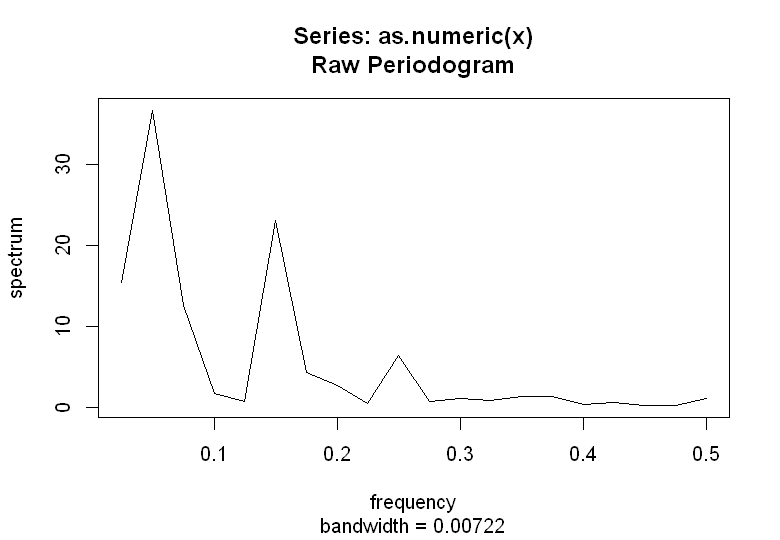

In [4]:
periodo <- spec.pgram(as.numeric(x), log="no")

#### Six most significant frequencies according to values of spectrum in periodogram

In [5]:
drawTable(type = "periodogram", periodogram = periodo)

spectrum,36.70455,23.06539,15.41312,12.59632,6.34893,4.247628
frequency (raw),0.05000,0.15000,0.02500,0.07500,0.25000,0.175000


In [6]:
# orders k for Fourier frequencies
print(round(length(x)*c(0.05000,0.15000,0.02500,0.07500,0.25000,0.175000)))

[1]  2  6  1  3 10  7


In [6]:
fnames= c("2/40", "$6/40$", "$1/40$", "$3/40$", "$10/40$", "$7/40$")
drawTable(type = "periodogram", periodogram = periodo, frequencies = fnames)

spectrum,36.704555,23.065395,15.413119,12.596316,6.348930,4.247628
frequency (raw),0.050,0.150,0.025,0.075,0.250,0.175
frequency,$2/40$,$$6/40$$,$$1/40$$,$$3/40$$,$$10/40$$,$$7/40$$


| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | 

***
<a id=residual_diagnostics></a>
# <font color=brown> Residual diagnostics </font>

### Graphical (exploratory) tools 

>
>|$ $|$\large\mbox{Graphical-tools diagnostic matrix}$|$ $|
|---|------------------------------------------------|---| 
|   |   
|$\mbox{linearity of fixed effects (L)}$| $\mbox{outlying observations (O1)}\hspace{0.75cm}$ | $\mbox{independence of cond. errors (ACF)} $ |
|**stand. marg. residuals vs marg. fitted values**|**stand. marg. residuals vs times**$\hspace{0.75cm}$|**ACF of cond. residuals**|
|   |  
|$\mbox{homoscedascity of cond. errors (H)}$|$\mbox{outlying observations (O2)}\hspace{0.75cm}$|$\mbox{independence of cond. errors (PACF)} $ |
|**stand. cond. residuals vs cond. predictions**|**stand. cond. residuals vs times**$\hspace{0.75cm}$|**PACF of cond. residuals**|
|   | 
|$\mbox{normality of cond. errors (N1)}$|$\mbox{normality of cond. errors (N2)}\hspace{0.75cm}$|$\mbox{normality of cond. errors (N3)} $ |
|**histogram of cond. residuals**|**histogram of stand. least conf. residuals**$\hspace{0.75cm}$|**stand. least conf. residuals vs $\mathcal{N}(0,1)$ quantiles**|

More details about modelling procedure, diagnostic tools and technical information can be found in our extended illustration examples [cyberattacks](https://nbviewer.jupyter.org/github/fdslrm/EBLUP-NE/blob/master/Modeling/cyberattacks.ipynb), [tourism]( https://nbviewer.jupyter.org/github/fdslrm/EBLUP-NE/blob/master/Modeling/tourism.ipynb). Analogical steps of modelling and criteria of models quality also apply here. 

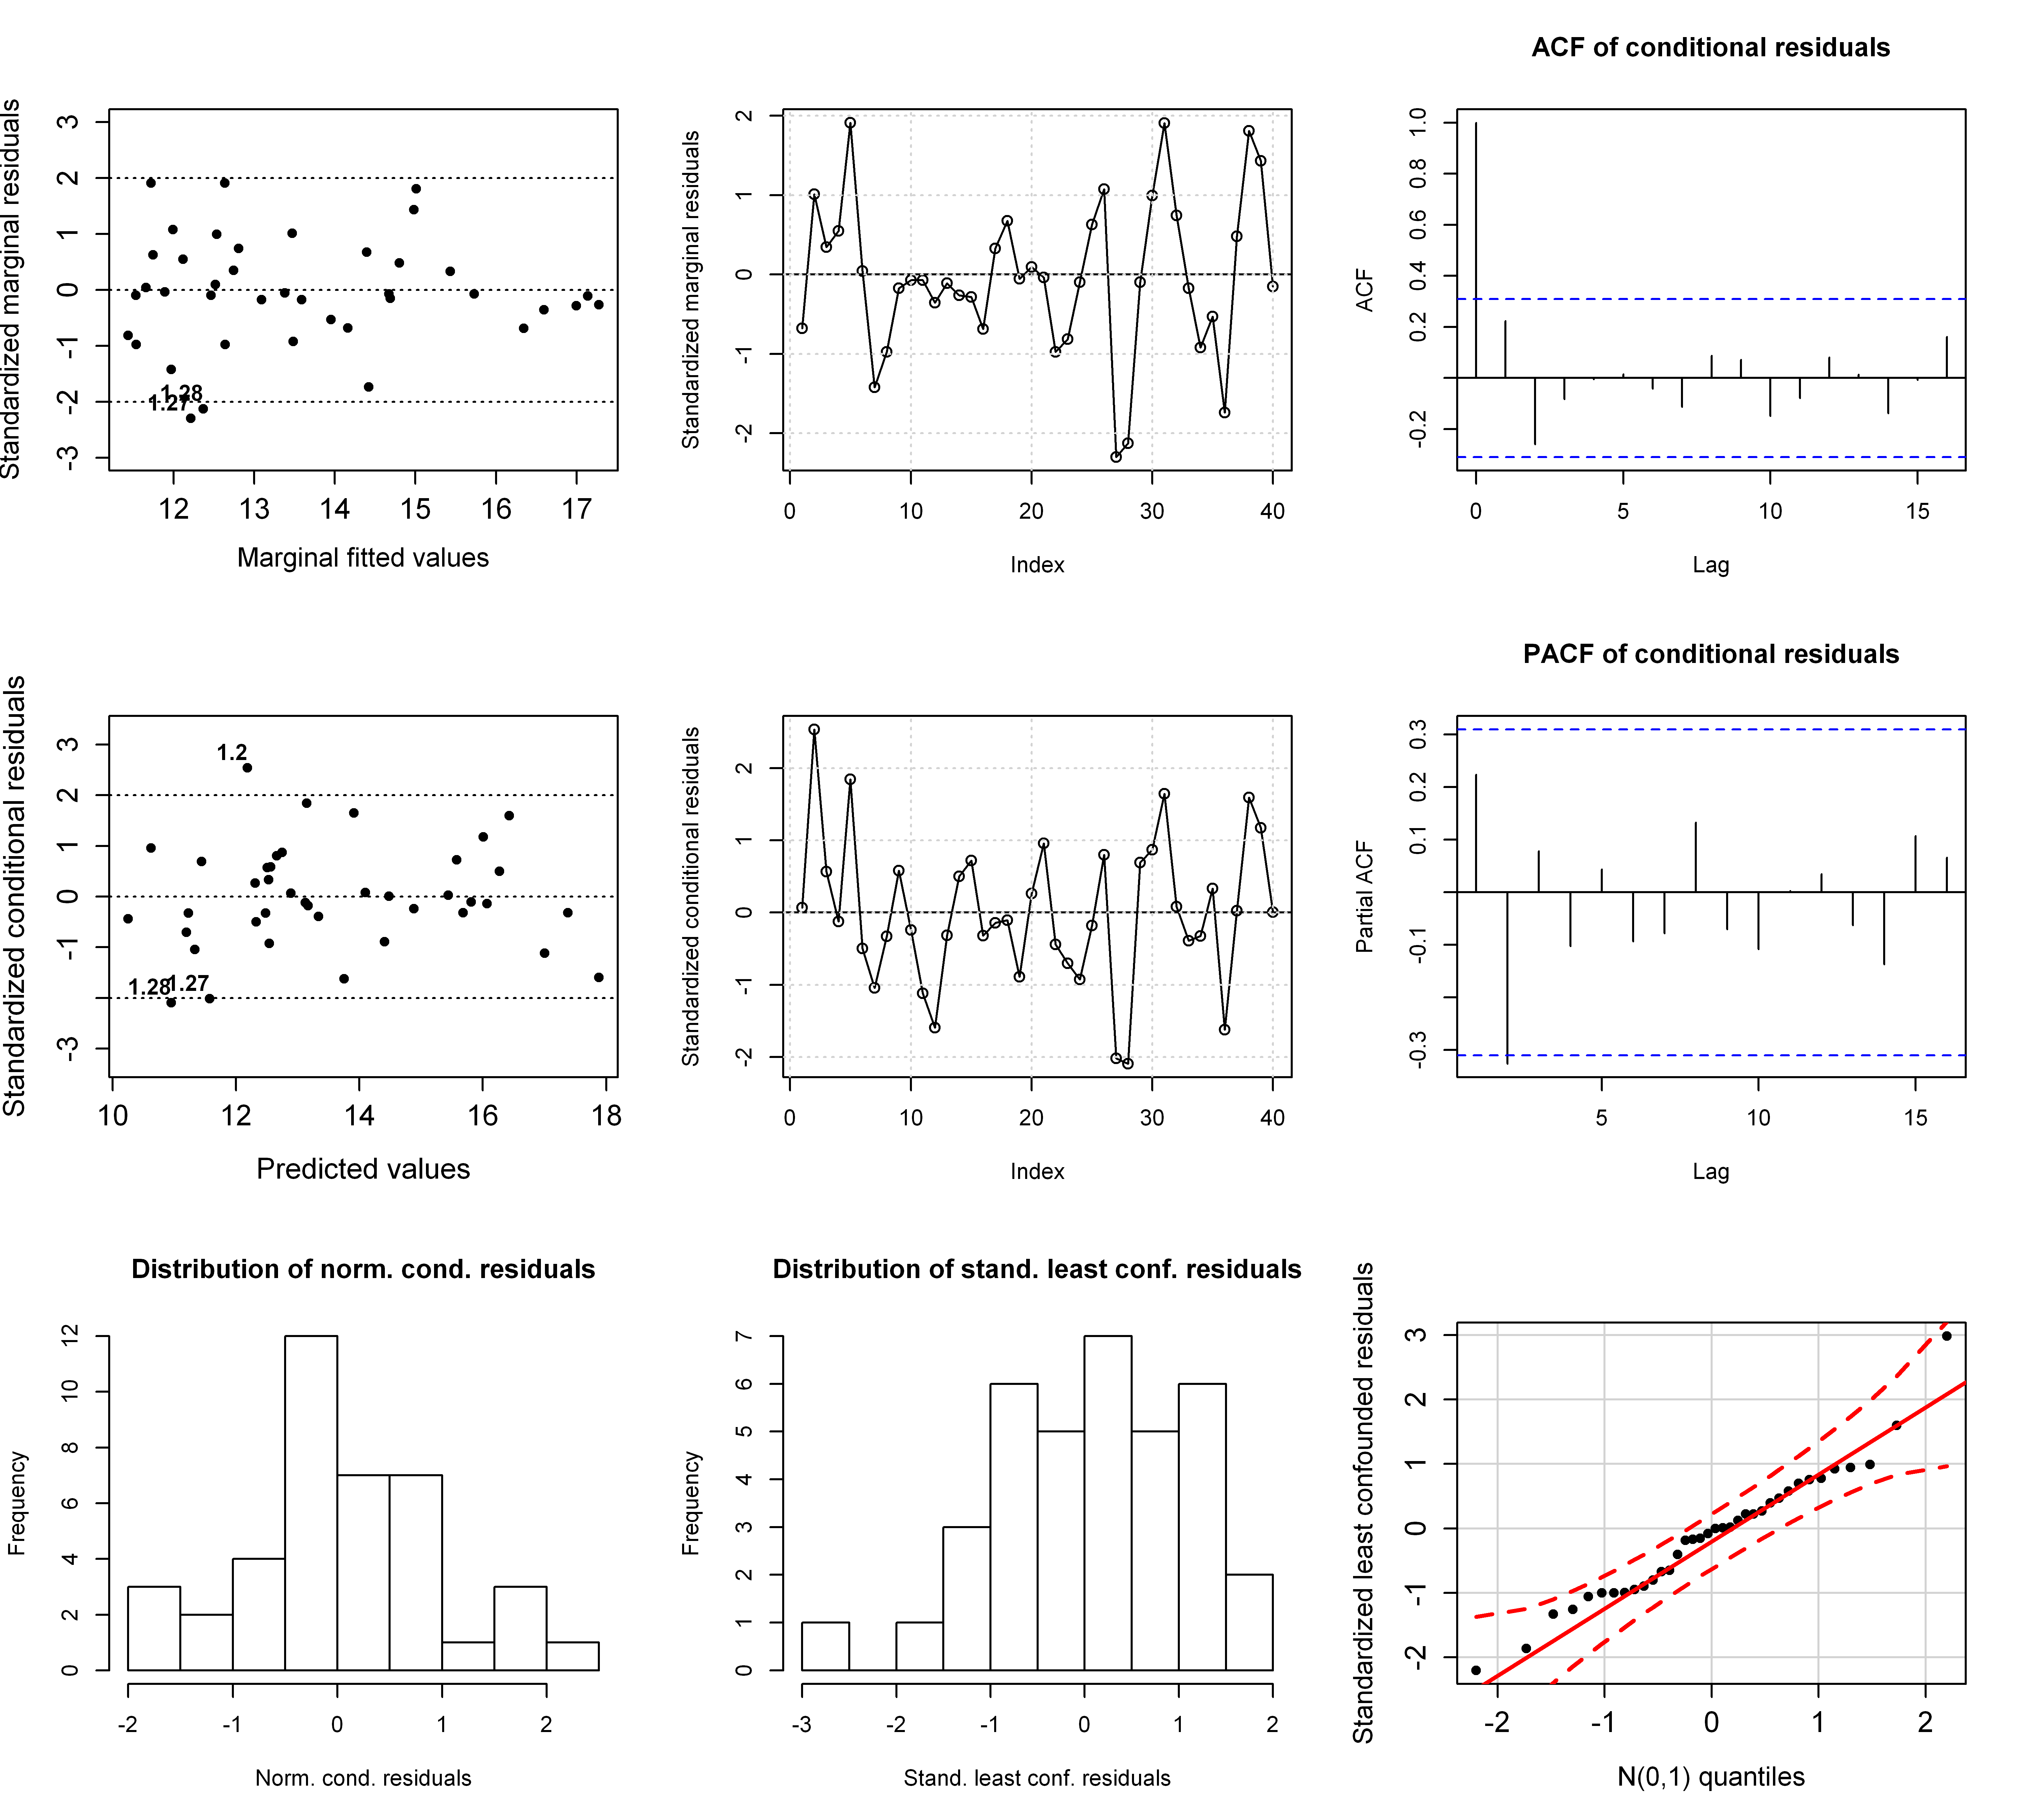

In [26]:
# Fitting the final FDSLRM
output <- fitDiagFDSLRM(as.numeric(x), t, c(1/40,2/40,3/40), include_fixed_eff = c(0,1,0,1,1,0), 
                          freq_random = c(6/40))

options(repr.plot.res=600, repr.plot.height=9, repr.plot.width=10)
drawDiagPlots("all", output)

### Numerical tests

#### Tests of residual independence

In [9]:
print(output$Box_test_lag10_resid)
print(output$BoxLjung_test_lag10_resid)


	Box-Pierce test

data:  resid(fit)
X-squared = 6.9615, df = 10, p-value = 0.7291


	Box-Ljung test

data:  resid(fit)
X-squared = 8.116, df = 10, p-value = 0.6175



#### Test of residual normality

In [29]:
print(output$ShapiroWilk_test_norm_cond_resid)
print(output$ShapiroWilk_test_stand_least_conf_resid)


	Shapiro-Wilk normality test

data:  resid(fit, type = "normalized")
W = 0.98267, p-value = 0.7869


	Shapiro-Wilk normality test

data:  SingerEtAl_resid_diag$least.confounded.residuals
W = 0.96672, p-value = 0.3429



| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | 

***
<a id=fitting_summary></a>
# <font color=brown> Fitting summary </font>

### Parameter estimates

#### Estimates of regression coefficients

In [30]:
drawTable(type = "fixed", fixed_eff = output$fixed_effects)

,$\beta_{1}$,$\beta_{2}$,$\beta_{3}$,$\beta_{4}$
,13.60435,1.06742,-1.869608,1.085266


#### Predictions of random effects

In [12]:
drawTable(type = "random", random_eff = output$random_effects)

,$Y_{1}$,$Y_{2}$
,-0.2096453,-1.421755


#### Estimates of variance parameters

In [31]:
drawTable(type = "variance", variances = c(output$error_variance, diag(output$rand_eff_variance)))

$\sigma_{0}^2$,$\sigma_{1}^2$,$\sigma_{2}^2$
1.787633,0.0883934,2.107089


### Fit summary

#### Graphical  summary for the final model
* plot: **time series observations (black), fitted values (blue), estimated trend (red) vs times**

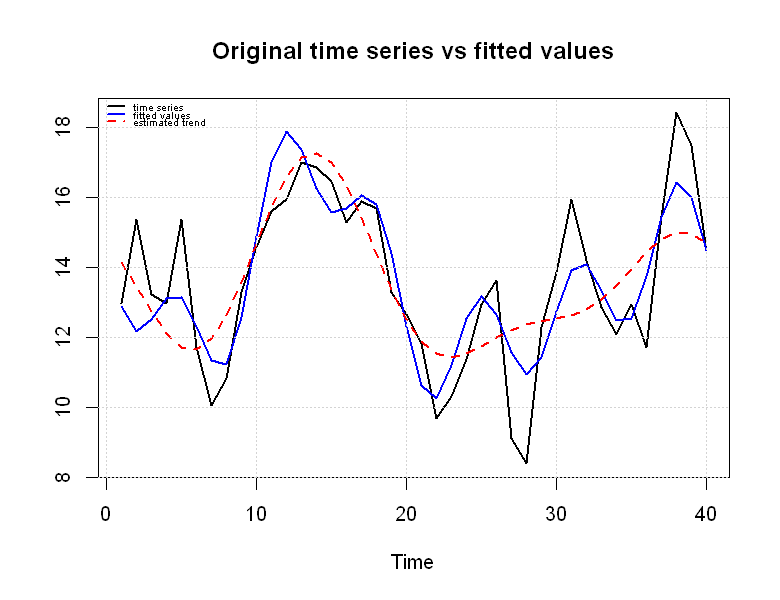

In [32]:
options(repr.plot.res=120, repr.plot.height=5, repr.plot.width=6.5)
drawDiagPlots(output$diagnostic_plots_names$FittedTimeSeries, output)

#### Numerical summary for the final model

In [33]:
print(output$fit_summary)

Linear mixed-effects model fit by REML
 Data: d 
       AIC      BIC    logLik
  153.6411 164.7257 -69.82053

Random effects:
 Formula: ~-1 + v1 + v2 | g
 Structure: Diagonal
               v1       v2 Residual
StdDev: 0.2973103 1.451582 1.337024

Fixed effects: as.formula(paste("x~", paste(names(d)[2:kk], collapse = "+"))) 
                Value Std.Error DF  t-value p-value
(Intercept) 13.604347 0.2114020 36 64.35296   0e+00
f2           1.067420 0.2989676 36  3.57035   1e-03
f3          -1.869608 0.2989676 36 -6.25355   0e+00
f4           1.085266 0.2989676 36  3.63005   9e-04
 Correlation: 
   (Intr) f2 f3
f2 0           
f3 0      0    
f4 0      0  0 

Standardized Within-Group Residuals:
       Min         Q1        Med         Q3        Max 
-1.9121632 -0.4256045 -0.1075678  0.5684974  2.3943864 

Number of Observations: 40
Number of Groups: 1 


| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | 

***
<a id=session_info></a>
# <font color=brown> Session info </font>

In [34]:
print(sessionInfo())

R version 3.5.1 (2018-07-02)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 8.1 x64 (build 9600)

Matrix products: default

locale:
[1] LC_COLLATE=Slovak_Slovakia.1250  LC_CTYPE=Slovak_Slovakia.1250   
[3] LC_MONETARY=Slovak_Slovakia.1250 LC_NUMERIC=C                    
[5] LC_TIME=Slovak_Slovakia.1250    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] CVXR_0.99-4      pracma_2.2.5     gnm_1.1-0        sommer_3.9.3    
 [5] crayon_1.3.4     lattice_0.20-38  matrixcalc_1.0-3 fpp2_2.3        
 [9] expsmooth_2.3    fma_2.3          ggplot2_3.1.1    forecast_8.7    
[13] nlme_3.1-139     car_3.0-2        carData_3.0-2    Matrix_1.2-17   
[17] MASS_7.3-51.4    IRdisplay_0.7.0  kableExtra_1.1.0 fdslrm_0.1.0    

loaded via a namespace (and not attached):
 [1] xts_0.11-2        scs_1.2-3         bit64_0.9-7       webshot_0.5.1    
 [5] httr_1.4.0        repr_1.0.0        tools_3.5.1       R6_

| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | 

***
<a id=references></a>
# <font color=brown> References </font>


* Hyndman, R. J., Athanasopoulos, G. (2018). [Forecasting: Principles and Practice (2nd ed.)](https://otexts.com/fpp2/index.html). OTexts: Melbourne, Australia


* Gajdoš, A., Hanč, J., Hančová, M. (2019), [R package for modeling and prediction of time series using linear mixed models](https://github.com/fdslrm/R-package)


* R Core Team (2019). R: A language and environment for statistical computing. R Foundation for
  Statistical Computing, Vienna, Austria. URL: https://www.R-project.org/

| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | 